In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("E:\\onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 5)
classifier = classifier.fit(X_train , y_train)

In [18]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
pred = classifier.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , pred)

0.9991057143126574

In [21]:
from sklearn.metrics import precision_score
precision_score(y_test , pred)

0.7482946793997272

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , pred)

array([[1905982,     369],
       [   1338,    1097]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.75      0.45      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.87      0.73      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



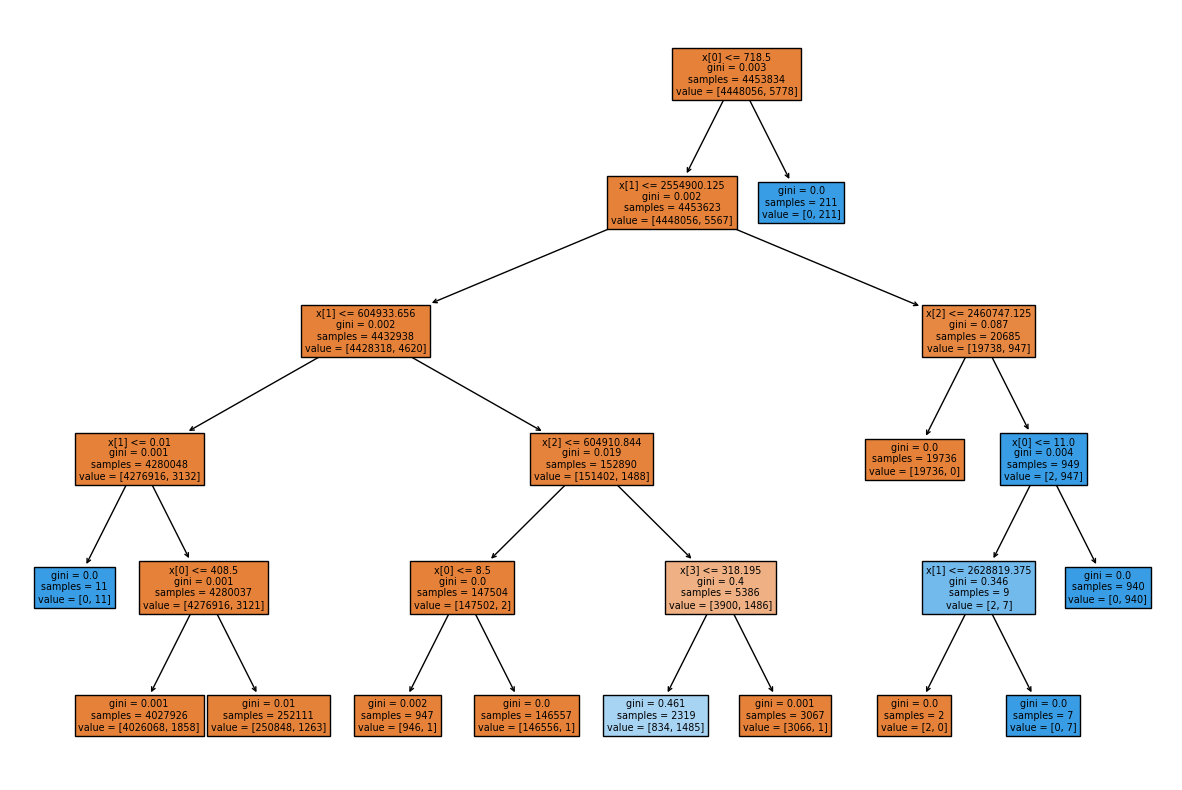

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)
plt.show()